In [77]:
%reload_ext autoreload
%autoreload 2

In [78]:
# %load "/Users/haleighwright/Desktop/NCEAS/pyriv/notebooks/nb_config.py"
import sys
sys.path.append("/Users/haleighwright/Desktop/NCEAS/pyriv")
sys.path.append("/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages")
import networkx as nx
import numpy as np
import sys
import geopandas as gpd
from shapely.geometry import Point
from multiprocessing import Pool

#from pyriv import river_graph as RiverGraph
#from pyriv import graph_prep as GraphBuilder

%matplotlib inline

In [81]:
from pyriv import snapping_processor as SnapTool

In [16]:
canada_lowres = GraphBuilder.GraphBuilder('../../Data/canada/hydro_l/hydro_l_3338.shp')

Weighting Edges with Distances


In [18]:
SnapTool.general_stats(canada_lowres.graph)

Number of edges: 10994
Number of nodes: 10008


In [21]:
SnapTool.component_stats(canada_lowres.graph, 'f')

Is the graph weakly connected ? False
Number of weakly connected components: 2493
Is the graph semiconnected ? False
Is the graph strongly connected ? False


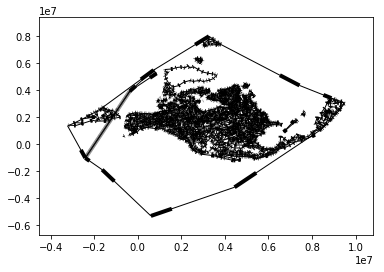

In [22]:
canada_lowres.graph.plot()

In [24]:
edge_countries = nx.get_edge_attributes(canada_lowres.graph, 'COUNTRY')

### grab all the edges that are in canada

In [29]:
new_edges = []
for edge in canada_lowres.graph.edges():
    if edge_countries[edge] == 'CAN':
        new_edges.append(edge)
    

In [31]:
canada_only = nx.DiGraph(new_edges)

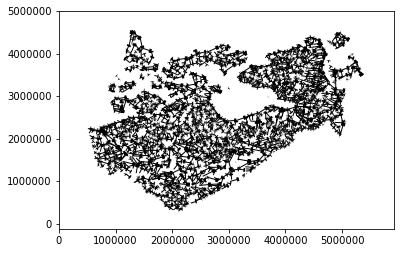

In [36]:
pos = dict(zip(canada_only.nodes(), canada_only.nodes()))
nx.draw_networkx_edges(canada_only, pos)

In [38]:
ak_pruned = GraphBuilder.GraphBuilder('../../Data/sasap/highres_AK_pruned/edges.shp')

Weighting Edges with Distances


In [43]:
ak_crs = GraphBuilder.GraphBuilder('../../Data/sasap/highres_AK_pruned/edges_crs.shp')

Weighting Edges with Distances


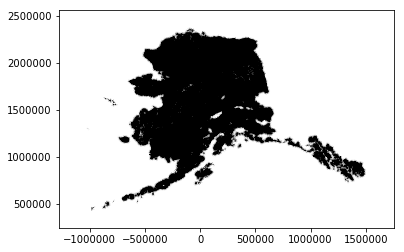

In [39]:
ak_pruned.graph.plot()

In [40]:
SnapTool.general_stats(ak_pruned.graph)

Number of edges: 406507
Number of nodes: 408613


In [47]:
print ak_pruned.graph.crs

None


### Compose Alaska high res with Canada low - res

In [51]:
g = nx.compose(ak_pruned.graph, canada_only)


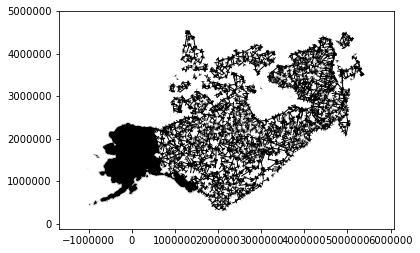

In [52]:
g.plot()

### Compose canada_subset (the subset of canada we're interested in) with high-res alaska
Less processing time

In [83]:
canada_subset = GraphBuilder.GraphBuilder('../../Data/canada/canada_subset/canada_subset.shp')

Weighting Edges with Distances


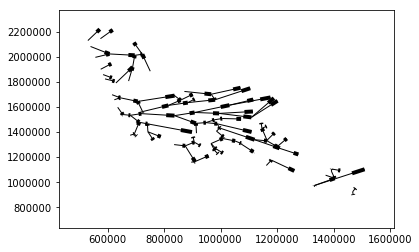

In [84]:
canada_subset.graph.plot()

In [86]:
SnapTool.general_stats(canada_subset.graph)

Number of edges: 117
Number of nodes: 120


In [88]:
ak_ca = nx.compose(ak_pruned.graph, canada_subset.graph)

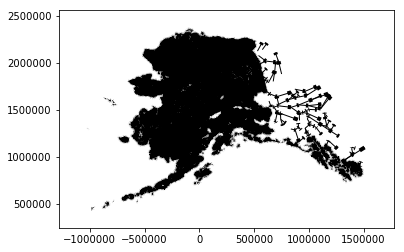

In [89]:
ak_ca.plot()

In [82]:
%%time
snapped_can_ak = SnapTool.snap_graph(ak_ca, 5.0, 'snapped_can_ak')

Exception KeyboardInterrupt in 'zmq.backend.cython.message.Frame.__dealloc__' ignored


KeyboardInterrupt: 

In [48]:
def join_two_disjoint_river_networks(graph1, graph2, dist_thresh):
    g = nx.compose(graph1, graph2)
    SnapTool.snap_graph()
    

NameError: name 'shapely' is not defined